# Variational Autoencoder (VAE) Training - Fixed & Improved

Trains a VAE for each MVTec AD category with **KL annealing** and **Stability Improvements**.

**Improvements in this version:**
- **Gradient Clipping**: Prevents exploding gradients.
- **LogVar Clamping**: Prevents latent space numerical instability (NaNs).
- **NaN Checks**: Skips batches that cause numerical errors.
- **Refactored Code**: Uses `src.training.vae_trainer` for cleaner execution.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import sys
sys.path.insert(0, 'F:/Thesis')

import torch
from src.config import DEVICE, MVTEC_CATEGORIES, ensure_dirs
from src.training.vae_trainer import train_vae_category

ensure_dirs()
print(f"Device: {DEVICE}")

Device: cpu


## Configuration

In [2]:
CONFIG = {
    'batch_size': 16,
    'num_epochs': 50,
    'learning_rate': 1e-3,
    'weight_decay': 1e-5,
    'latent_dim': 128,
    'beta_max': 0.001,  # Weight for KL divergence (small to prioritize reconstruction)
    'beta_warmup_epochs': 10, 
    'patience': 5,
    'save_every': 10,
}

# You can limit categories here for testing
CATEGORIES_TO_TRAIN = MVTEC_CATEGORIES
# CATEGORIES_TO_TRAIN = ['bottle']

print(f"Categories to train: {len(CATEGORIES_TO_TRAIN)}")
print(f"Config: {CONFIG}")

Categories to train: 15
Config: {'batch_size': 16, 'num_epochs': 50, 'learning_rate': 0.001, 'weight_decay': 1e-05, 'latent_dim': 128, 'beta_max': 0.001, 'beta_warmup_epochs': 10, 'patience': 5, 'save_every': 10}


## Run Robust Training Loop


Training VAE: BOTTLE


bottle: 100%|██████████| 50/50 [09:26<00:00, 11.33s/it]


BOTTLE ROC-AUC: 0.1992


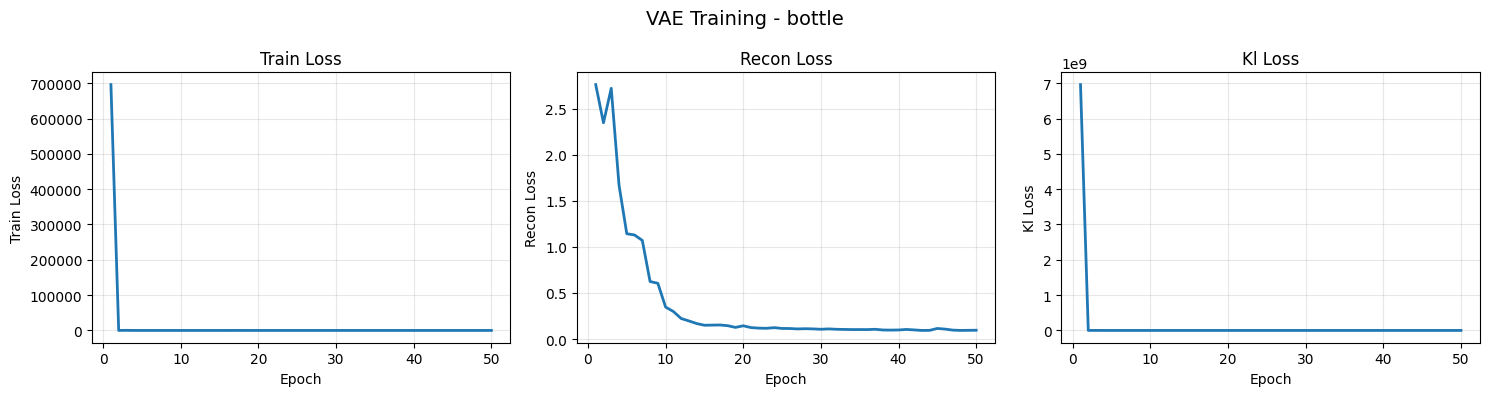


Training VAE: CABLE


cable: 100%|██████████| 50/50 [12:38<00:00, 15.16s/it]


CABLE ROC-AUC: 0.3606


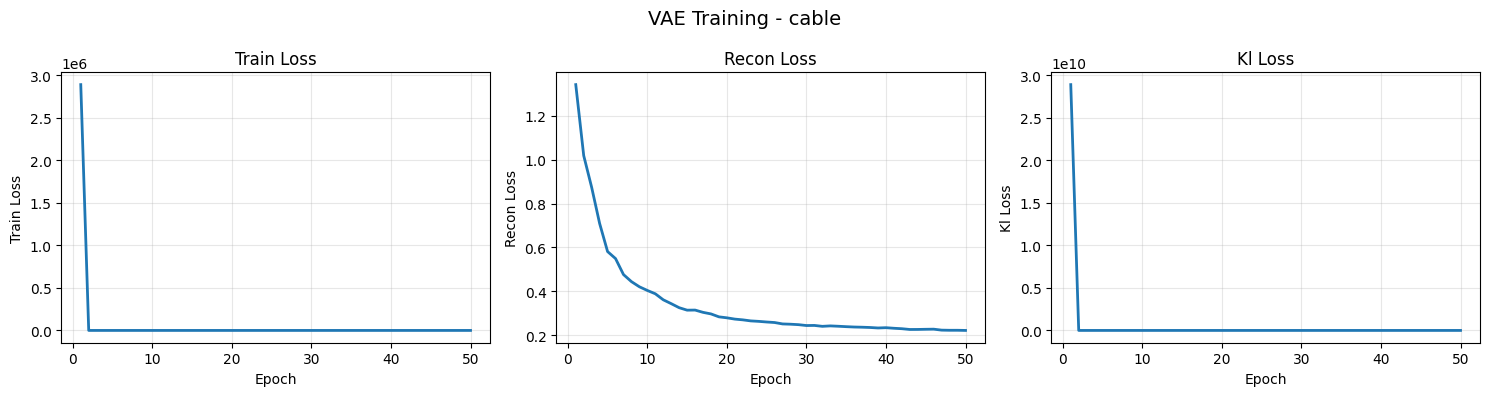


Training VAE: CAPSULE


capsule: 100%|██████████| 50/50 [12:13<00:00, 14.68s/it]


CAPSULE ROC-AUC: 0.4819


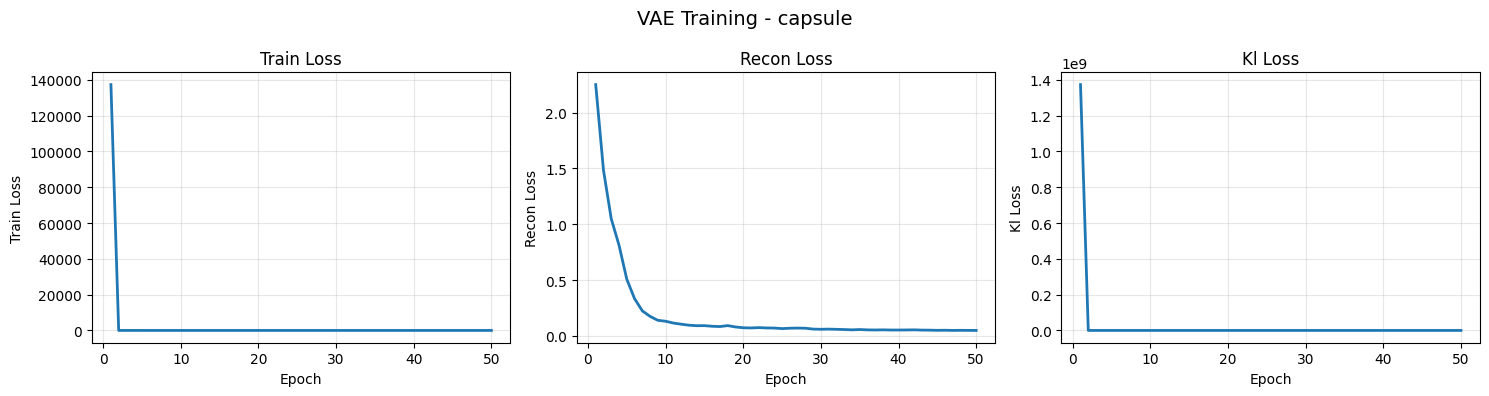


Training VAE: CARPET


carpet:  84%|████████▍ | 42/50 [13:37<02:35, 19.47s/it]

Early stopping at epoch 43


CARPET ROC-AUC: 0.6172


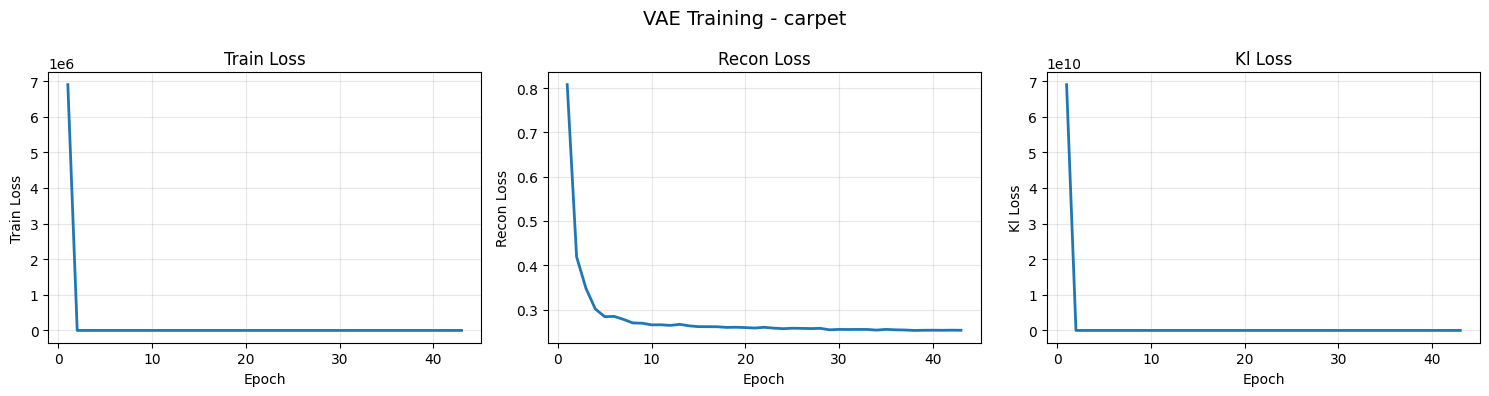


Training VAE: GRID


grid:  98%|█████████▊| 49/50 [11:30<00:14, 14.09s/it]

Early stopping at epoch 50


GRID ROC-AUC: 0.2974


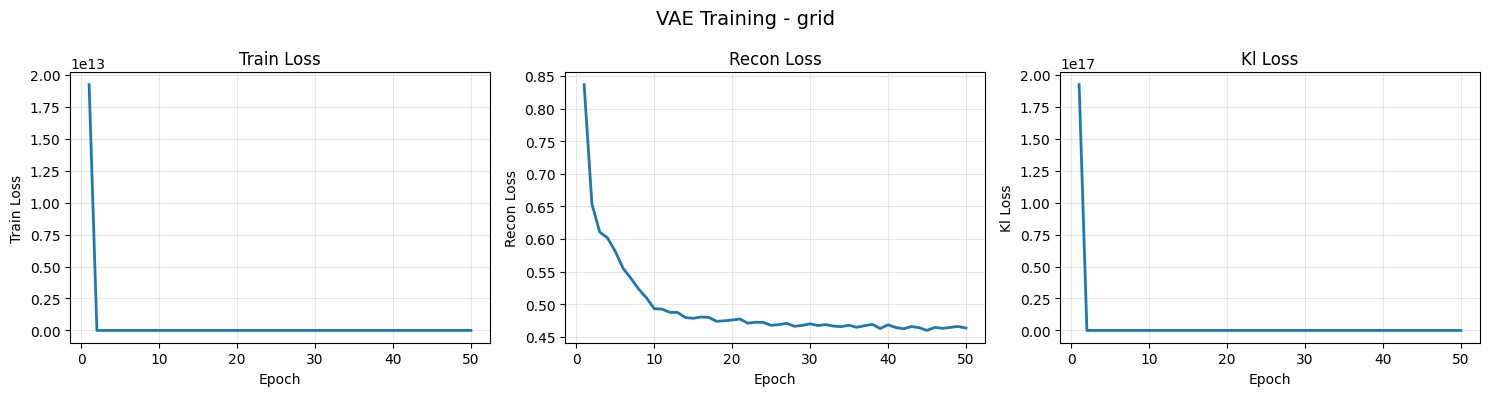


Training VAE: HAZELNUT


hazelnut:  12%|█▏        | 6/50 [03:12<23:29, 32.02s/it]

Early stopping at epoch 7


HAZELNUT ROC-AUC: 0.2550


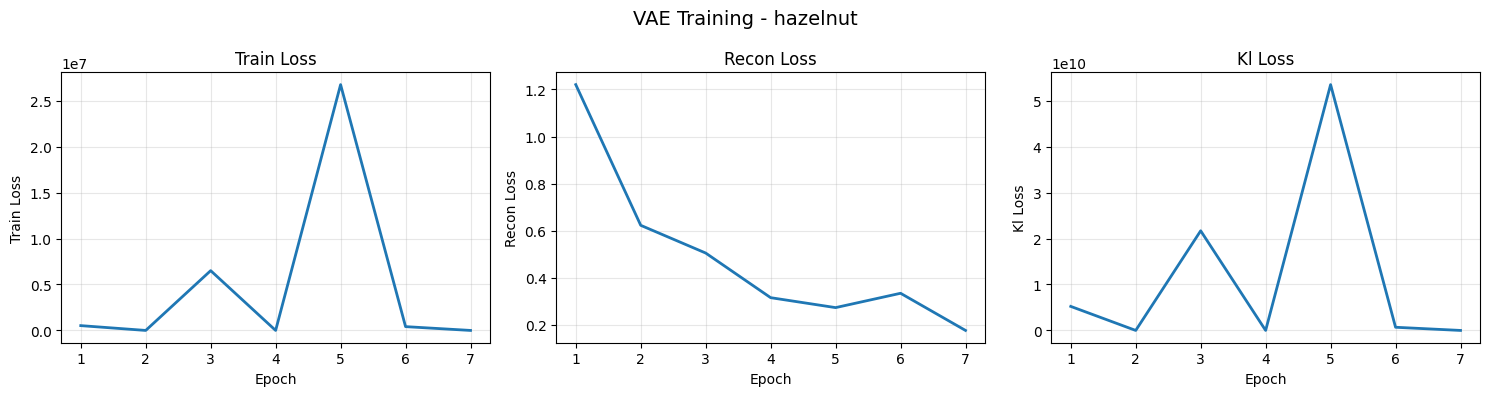


Training VAE: LEATHER


leather:  74%|███████▍  | 37/50 [10:01<03:31, 16.26s/it]

Early stopping at epoch 38


LEATHER ROC-AUC: 0.3033


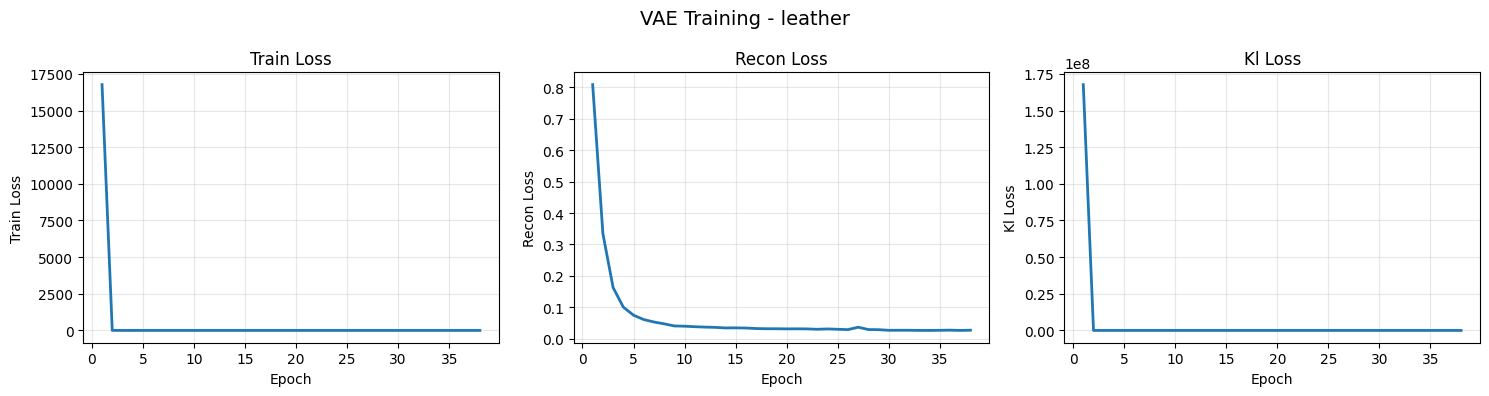


Training VAE: METAL_NUT


metal_nut: 100%|██████████| 50/50 [09:16<00:00, 11.13s/it]


METAL_NUT ROC-AUC: 0.1515


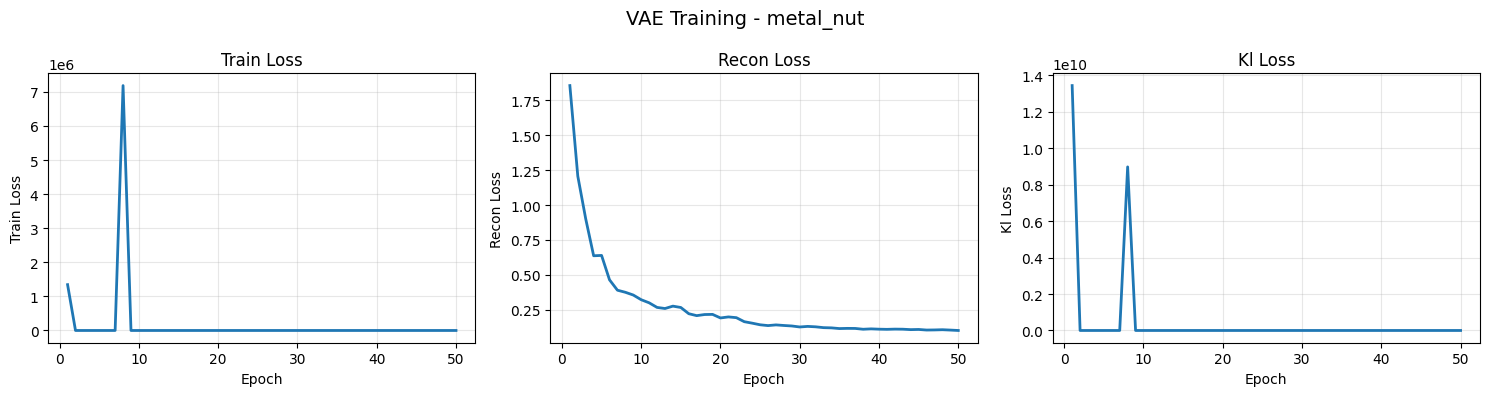


Training VAE: PILL


pill: 100%|██████████| 50/50 [12:25<00:00, 14.92s/it]


PILL ROC-AUC: 0.6015


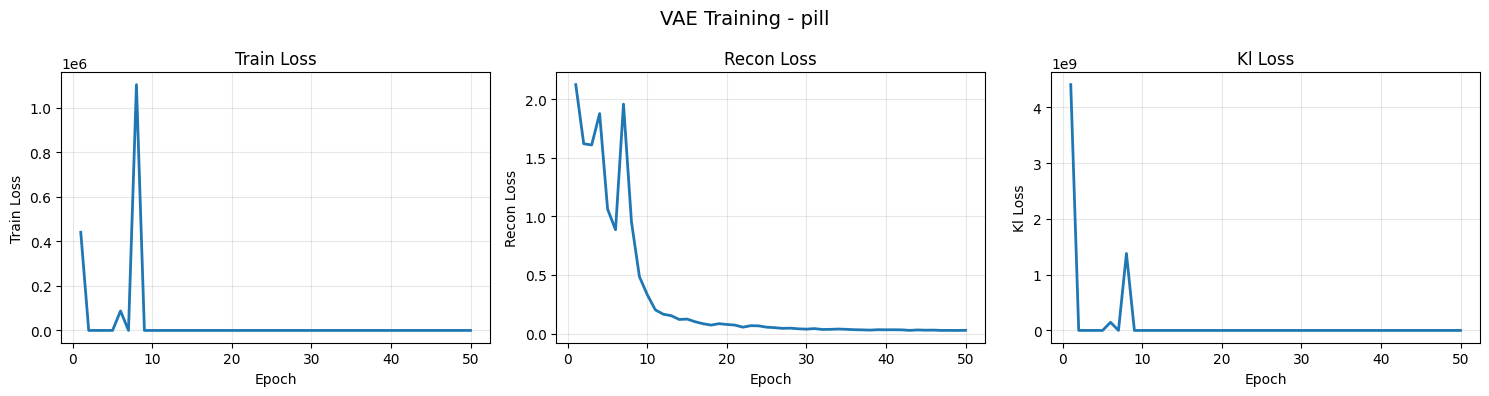


Training VAE: SCREW


screw: 100%|██████████| 50/50 [13:50<00:00, 16.61s/it]


SCREW ROC-AUC: 0.0738


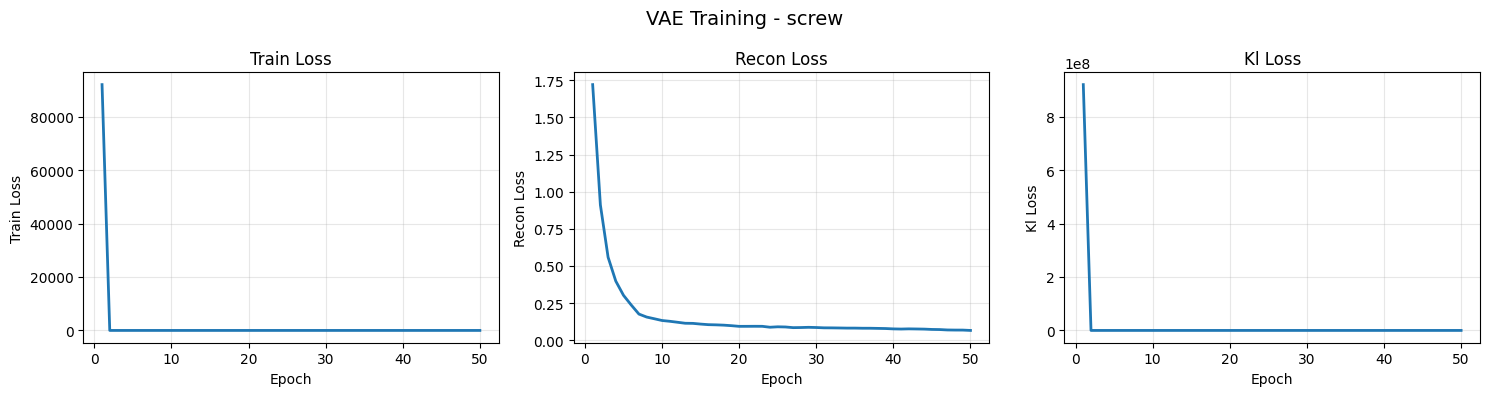


Training VAE: TILE


tile:  76%|███████▌  | 38/50 [08:48<02:46, 13.90s/it]

Early stopping at epoch 39


TILE ROC-AUC: 0.5693


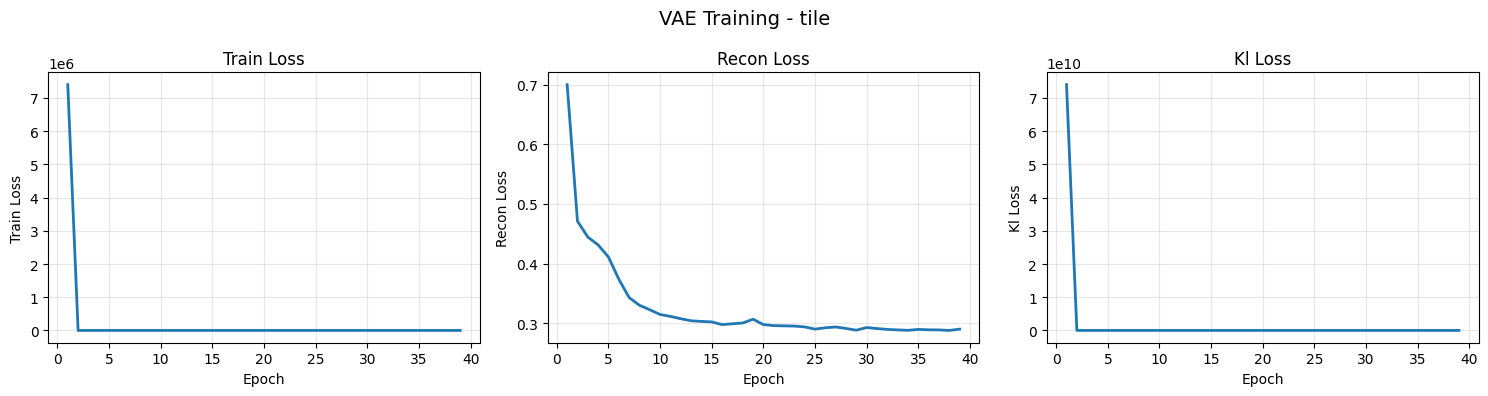


Training VAE: TOOTHBRUSH


toothbrush:  12%|█▏        | 6/50 [00:28<03:32,  4.83s/it]

Early stopping at epoch 7


TOOTHBRUSH ROC-AUC: 0.6861


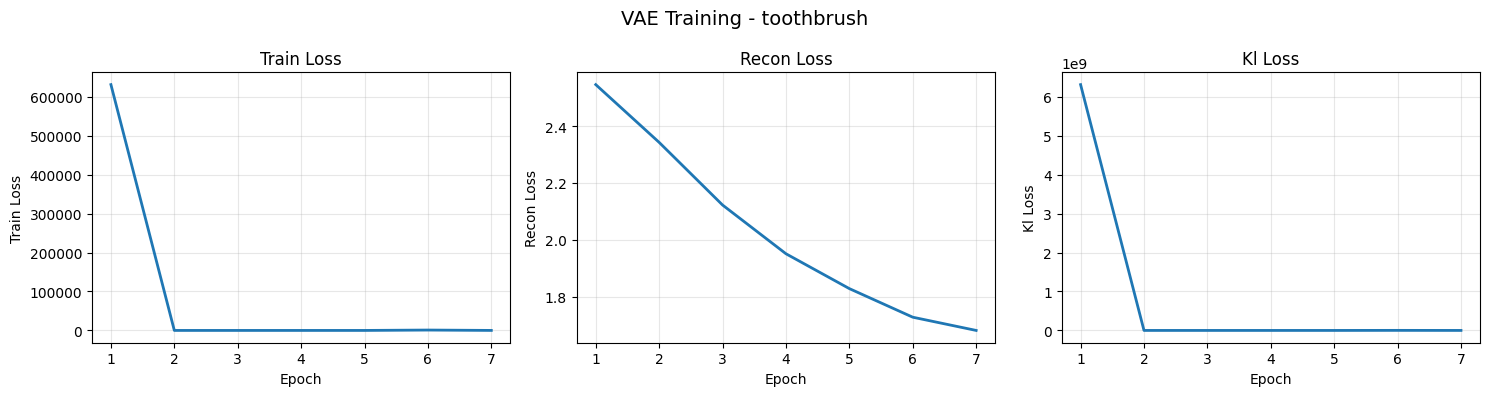


Training VAE: TRANSISTOR


transistor: 100%|██████████| 50/50 [12:37<00:00, 15.14s/it]


TRANSISTOR ROC-AUC: 0.3029


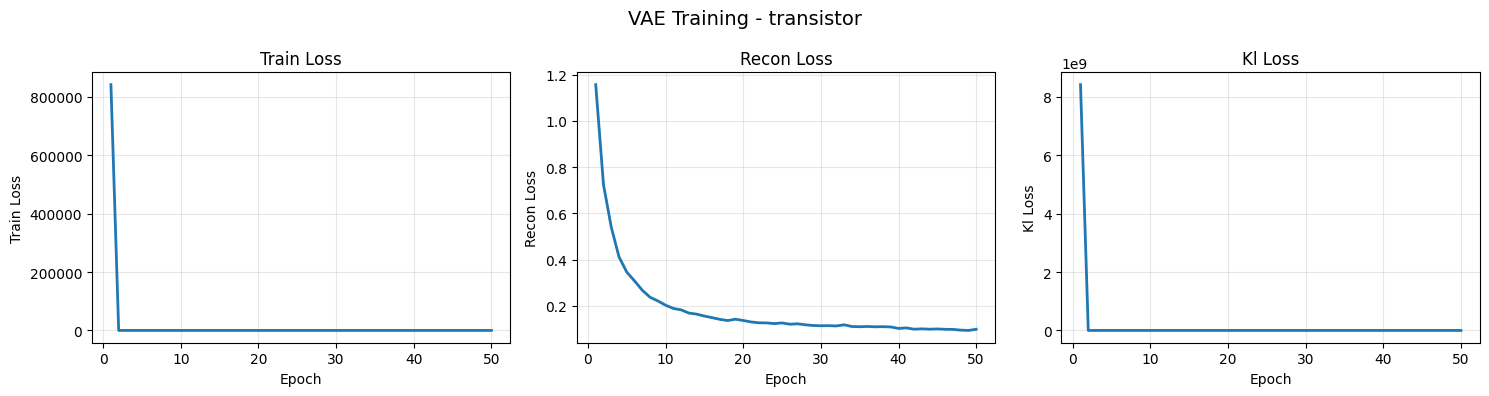


Training VAE: WOOD


wood:  86%|████████▌ | 43/50 [12:27<02:01, 17.39s/it]

Early stopping at epoch 44


WOOD ROC-AUC: 0.8044


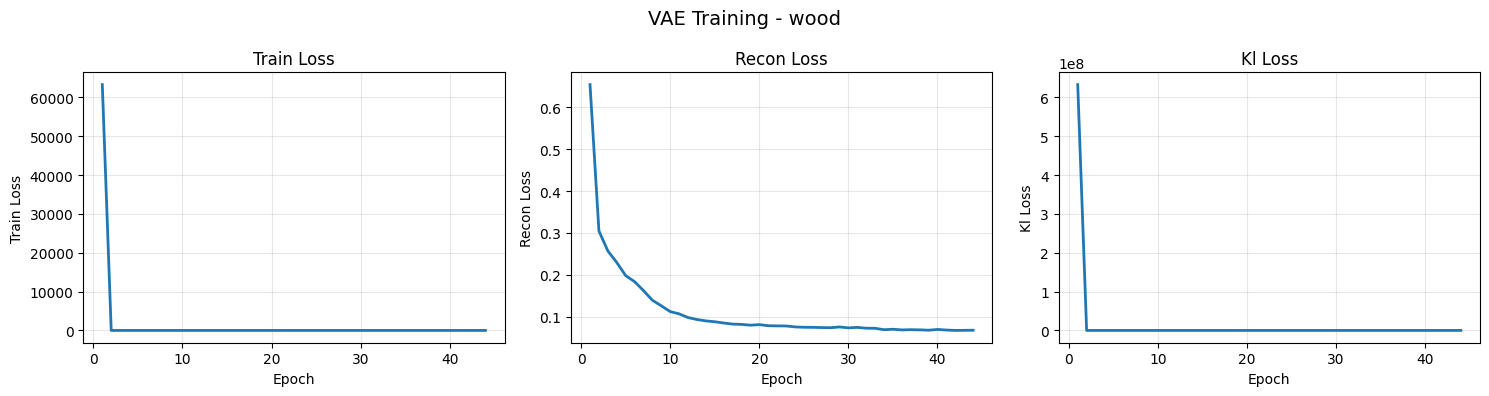


Training VAE: ZIPPER


zipper: 100%|██████████| 50/50 [10:09<00:00, 12.20s/it]


ZIPPER ROC-AUC: 0.4803


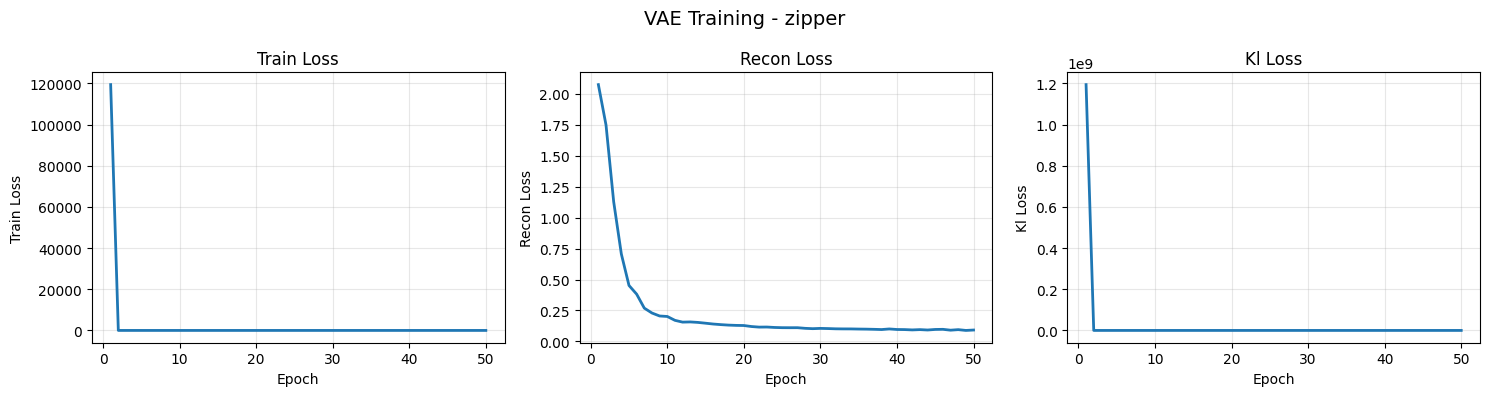


Training Summary:
bottle: AUC 0.1992, Final Loss 0.1183
cable: AUC 0.3606, Final Loss 0.2683
capsule: AUC 0.4819, Final Loss 0.0749
carpet: AUC 0.6172, Final Loss 0.2591
grid: AUC 0.2974, Final Loss 0.4744
hazelnut: AUC 0.2550, Final Loss 16.0555
leather: AUC 0.3033, Final Loss 0.0345
metal_nut: AUC 0.1515, Final Loss 0.1278
pill: AUC 0.6015, Final Loss 0.0382
screw: AUC 0.0738, Final Loss 0.0991
tile: AUC 0.5693, Final Loss 0.3014
toothbrush: AUC 0.6861, Final Loss 33.9533
transistor: AUC 0.3029, Final Loss 0.1297
wood: AUC 0.8044, Final Loss 0.0820
zipper: AUC 0.4803, Final Loss 0.1201


In [3]:
results = {}

for category in CATEGORIES_TO_TRAIN:
    try:
        res = train_vae_category(category, CONFIG, device=DEVICE)
        if res:
            results[category] = res
    except Exception as e:
        print(f"Failed to train {category}: {e}")
        
# Summary
print("\nTraining Summary:")
for cat, res in results.items():
    print(f"{cat}: AUC {res.get('auc', 0.0):.4f}, Final Loss {res.get('final_loss', 0.0):.4f}")